In [1]:
# Importing reqired libraries

In [2]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
import warnings

# Remove all warnings
warnings.filterwarnings("ignore")

In [4]:
# Creating a Simple Neural Network Architectuer for linear regression problem

In [5]:
class ANNnet(nn.Module):
    def __init__(self, input_size, hidden_1_shape, hidden_2_shape, hidden_3_shape, output_size):
        super(ANNnet, self).__init__()
        
        # Initialize weights using Xavier initialization
        self.weight_hidden_1 = nn.init.xavier_uniform_(nn.Parameter(torch.empty(input_size, hidden_1_shape, requires_grad=True)))
        self.bias_hidden_1 = torch.nn.init.trunc_normal_(torch.empty(hidden_1_shape, requires_grad=True))

        self.weight_hidden_2 = nn.init.xavier_uniform_(nn.Parameter(torch.empty(hidden_1_shape, hidden_2_shape, requires_grad=True)))
        self.bias_hidden_2 = torch.nn.init.trunc_normal_(torch.empty(hidden_2_shape, requires_grad=True))

        self.weight_hidden_3 = nn.init.xavier_uniform_(nn.Parameter(torch.empty(hidden_2_shape, hidden_3_shape, requires_grad=True)))
        self.bias_hidden_3 = torch.nn.init.trunc_normal_(torch.empty(hidden_3_shape, requires_grad=True))

        self.weight_output = nn.init.xavier_uniform_(nn.Parameter(torch.empty(hidden_3_shape, output_size, requires_grad=True)))
        self.bias_output = torch.nn.init.trunc_normal_(torch.empty(output_size, requires_grad=True))
        
        # define layers
        self.first_hidden_layer = None
        self.second_hidden_layer = None
        self.third_hidden_layer = None
        self.final_output = None
        
                                                             
    def forward(self, input_data):
        # calculating for first hidden layer
        self.first_hidden_layer = torch.matmul(input_data, self.weight_hidden_1) + self.bias_hidden_1
        activation_first_hidden_layer = torch.relu(self.first_hidden_layer)
        
        # calculating for first hidden layer
        self.second_hidden_layer = torch.matmul(activation_first_hidden_layer, self.weight_hidden_2) + self.bias_hidden_2
        activation_second_hidden_layer = torch.relu(self.second_hidden_layer)
        
        # calculating for first hidden layer
        self.third_hidden_layer = torch.matmul(activation_second_hidden_layer, self.weight_hidden_3) + self.bias_hidden_3
        activation_third_hidden_layer = torch.relu(self.third_hidden_layer)
        
        # calculating for first hidden layer
        self.final_output = torch.matmul(activation_third_hidden_layer, self.weight_output) + self.bias_output
        
        return self.final_output
    

In [6]:
# Training

In [7]:
# Reading Dataset

In [8]:
df = pd.read_csv("../../data/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
# shape of dataset
df.shape

(200, 4)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

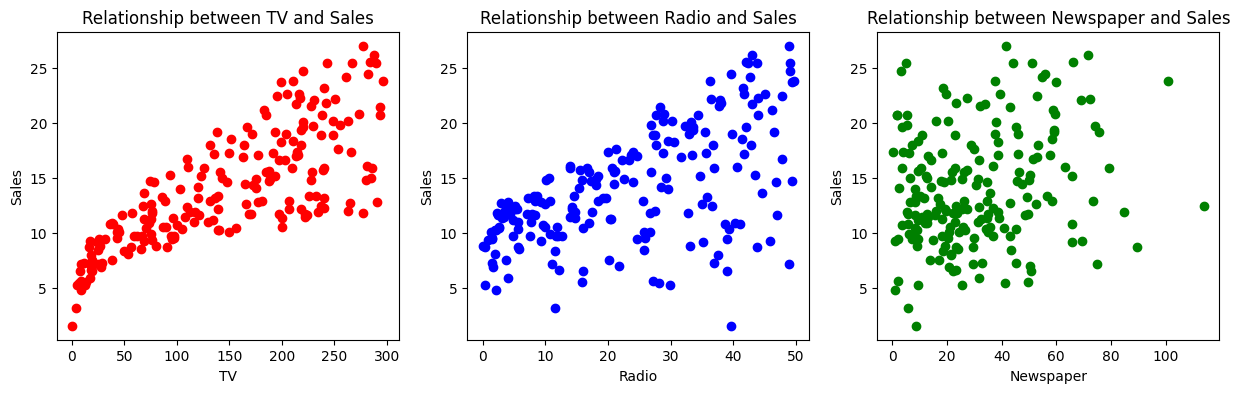

In [11]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.scatter(data=df, x="TV", y="sales", color='red')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Relationship between TV and Sales")
    
plt.subplot(1, 3, 2)
plt.scatter(data=df, x="radio", y="sales", color='blue')
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Relationship between Radio and Sales")
    
plt.subplot(1, 3, 3)
plt.scatter(data=df, x="newspaper", y="sales", color='green')
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Relationship between Newspaper and Sales")

plt.show()
    

In [12]:
# Spliting data in to train and test set

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.iloc[:,0:3]
y = df.iloc[:,-1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape

((160, 3), (40, 3))

In [17]:
# Converting into tensor

In [18]:
X = torch.tensor(X_train.values, dtype=torch.float32)
Y = torch.tensor(y_train.values, dtype=torch.float32)

test_X = torch.tensor(X_test.values, dtype=torch.float32)
test_Y = torch.tensor(y_test.values, dtype=torch.float32)
test_Y = test_Y.unsqueeze(1)

#Let's put the number of training example, and features in separate variable
num_samples = X.shape[0]
num_features = X.shape[1]

In [19]:
# Normalizing train and test data

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
scaler.fit(X_train)

MinMaxScaler()

In [22]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Training the Model

In [24]:
def training(model, inputs, outputs, lr=0.001):
    # forward propagation
    
    # making gradient zero for each forward calculatuion
    optimizer.zero_grad()
    
    #calculation
    y_pred = model(inputs)
    current_loss = loss(outputs, y_pred)
   
    # backward propagation
    current_loss.backward()
    optimizer.step()
    
    return current_loss.item()

In [25]:
# Hyperparameters
input_size = num_features
hidden_1 = 8
hidden_2 = 5
hidden_3 = 5
output_size = 1
learning_rate = 0.001
num_epochs = 10
batch_size = 64

In [26]:
model = ANNnet(
    input_size = input_size,
    hidden_1_shape = hidden_1, 
    hidden_2_shape = hidden_2,
    hidden_3_shape = hidden_3,
    output_size = output_size
)

In [27]:
# Loss and Optimizer

In [28]:
# Compute the mean squared error loss
loss = nn.MSELoss()

In [29]:
# Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [30]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [31]:
count_parameters(model)

94

In [32]:
# Running the training loop

In [33]:
num_epochs = 100
batch_size = 8

training_dataset = torch.utils.data.TensorDataset(X, Y)
# valid_dataset = torch.utils.data.TensorDataset(X, Y)

training_dataloader = torch.utils.data.DataLoader(training_dataset,batch_size=batch_size, shuffle=True)
# valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

In [34]:
loss_per_epoch = []
val_loss_per_epoch =[]

for i in range(num_epochs):
    current_losses = []
    for batch, (x_batch, y_batch) in enumerate(training_dataloader):
        current_loss = training(model, x_batch, y_batch, learning_rate)
        current_loss = np.average(current_loss)
        
    loss_per_epoch.append(current_loss)
    validation_loss = loss(model(test_X), test_Y).item()
    val_loss_per_epoch.append(validation_loss)
    print("Epoch {0}: Training loss= {1}   Validation loss {2}".format(i+1, current_loss, validation_loss))


Epoch 1: Training loss= 175.42164611816406   Validation loss 180.41070556640625
Epoch 2: Training loss= 217.59490966796875   Validation loss 136.69805908203125
Epoch 3: Training loss= 109.79027557373047   Validation loss 78.2895278930664
Epoch 4: Training loss= 82.01598358154297   Validation loss 28.361019134521484
Epoch 5: Training loss= 69.09367370605469   Validation loss 11.389528274536133
Epoch 6: Training loss= 40.72792053222656   Validation loss 10.389558792114258
Epoch 7: Training loss= 43.99232864379883   Validation loss 11.808366775512695
Epoch 8: Training loss= 54.276588439941406   Validation loss 11.767594337463379
Epoch 9: Training loss= 11.177135467529297   Validation loss 11.74140739440918
Epoch 10: Training loss= 27.949743270874023   Validation loss 12.291685104370117
Epoch 11: Training loss= 25.634546279907227   Validation loss 12.888664245605469
Epoch 12: Training loss= 30.956575393676758   Validation loss 13.572415351867676
Epoch 13: Training loss= 34.4857177734375   

In [35]:
# let's create plot for training and validation error

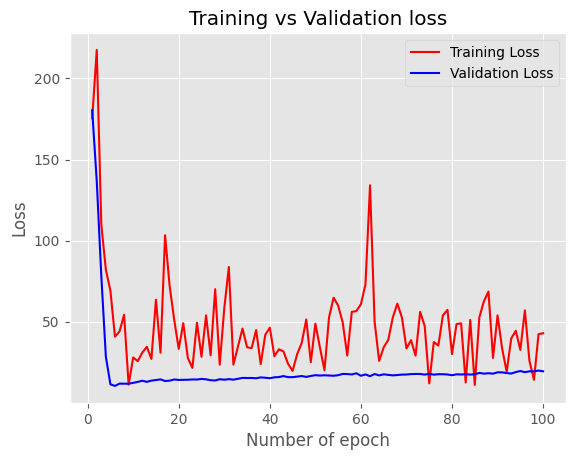

In [36]:
plt.style.use("ggplot")
epoch_iter= [i+1 for i in range(num_epochs)]
plt.title("Training vs Validation loss")
plt.plot(epoch_iter, loss_per_epoch, c='r', label = "Training Loss")
plt.plot(epoch_iter, val_loss_per_epoch, c='b',label = "Validation Loss")
plt.legend()
plt.xlabel('Number of epoch')
plt.ylabel('Loss')
plt.show()